**Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).**

Метрика для оценки – Коэффициент детерминации

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#### Подготовка данных

In [2]:
data = pd.read_csv("train.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [3]:
data.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


**Описание датасета:**

Id - айди

age - возраст преподавателя

years_of_experience - стаж преподавателя

lesson_price - стоимость урока

qualification - квалификация преподавателя

physics - преподает ли физику

chemistry - преподает ли химию

biology - преподает ли биологию

english - преподает ли английский

geography - преподает ли географию

history - преподает ли историю

mean_exam_points - целевое значение, средний балл за экзамен учеников

kaggle competitions download -c gb-tutors-expected-math-exam-results

In [4]:
X = data.drop(['Id', 'mean_exam_points'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


In [5]:
X = X.values
X

array([[4.00e+01, 0.00e+00, 1.40e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.80e+01, 4.00e+00, 2.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.90e+01, 0.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.40e+01, 1.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.30e+01, 3.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.50e+01, 0.00e+00, 1.45e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [6]:
y = data[['mean_exam_points']]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   mean_exam_points  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [7]:
y = y.values.flatten()
y

array([61, 76, 53, ..., 62, 56, 52], dtype=int64)

In [8]:
test = pd.read_csv("test.csv", sep=",")

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [10]:
test_X = test.drop(['Id'], axis = 1)
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


In [11]:
test_X = test_X.values
test_X

array([[4.60e+01, 3.00e+00, 1.05e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.30e+01, 3.00e+00, 1.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.20e+01, 1.00e+00, 1.55e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.30e+01, 5.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.80e+01, 0.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.90e+01, 5.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

*Поскольку машина не очень мощная,*
#### попробуем один из самых менее ресурсно-затратных алгоритмов XGBoost

In [12]:
# Реализуем класс узла

class Node:   
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [13]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        prediction = np.mean(self.labels)
        return prediction

In [14]:
# Расчет прироста

def quality_reg(left_labels, right_labels, current_variance):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_variance - p * np.var(left_labels) - (1 - p) * np.var(right_labels)

In [15]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [16]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_variance = np.var(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_reg(true_labels, false_labels, current_variance)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [17]:
# Построение дерева с помощью рекурсивной функции

def build_tree_depth_lim(data, labels, depth_lim = 20, depth = 0):

    quality, t, index = find_best_split(data, labels)
    #print("q: {} t: {} ind: {}".format(quality, t, index))

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0 or depth >= depth_lim:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_depth_lim(true_data, true_labels, depth_lim, depth + 1)
    false_branch = build_tree_depth_lim(false_data, false_labels, depth_lim, depth + 1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [18]:
def pred_item(item, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if item[node.index] <= node.t:
        return pred_item(item, node.true_branch)
    else:
        return pred_item(item, node.false_branch)

In [19]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * pred_item(x, tree) for tree, coef in zip(trees_list, coef_list)]) for x in X])

In [20]:
# В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем  𝐿2  loss  𝐿(𝑦,𝑧)=(𝑦−𝑧)2,  ее производная по  𝑧  примет вид  𝐿′(𝑦,𝑧)=2(𝑧−𝑦) . Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [21]:
def bias(y, z):
    return (y - z)

In [22]:
# Реализуем функцию обучения градиентного бустинга.

def gb_fit_lt(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    err_min = np.inf
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_depth_lim(X_train, y_train, max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_depth_lim(X_train, bias(y_train, target), max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        
            if test_errors[-1]-0.00005 > err_min:
                print(len(trees))
                break
            elif test_errors[-1] < err_min:
                err_min = test_errors[-1]

        if not (i+1)%10:
            print(i+1)
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [23]:
# Визуализация ошибки

def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(2, n_trees+1)
    plt.plot(list(range(2, n_trees+1)), train_err[1:], label='train error')
    plt.plot(list(range(2, n_trees+1)), test_err[1:], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [24]:
def grid_mtrs(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_lt(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
                test_prediction = gb_predict(X_test, trees, coefs, et)
                err = mean_squared_error(y_test, test_prediction)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = len(trees)
                    dp_b = dp
                    et_b = et
                    err_min = err
                get_error_plot(len(train_errors), train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr_b} деревьев глубиной {dp_b} с шагом {et_b} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

10
20
30
40
50
60
70
76
Ошибка алгоритма из 76 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 78.02723783247745
Ошибка алгоритма из 76 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 82.08221158140886


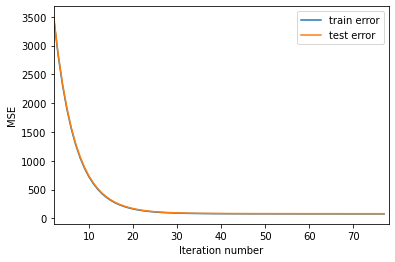

10
20
30
40
50
60
60
Ошибка алгоритма из 60 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 73.51718591900719
Ошибка алгоритма из 60 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 78.20826695230855


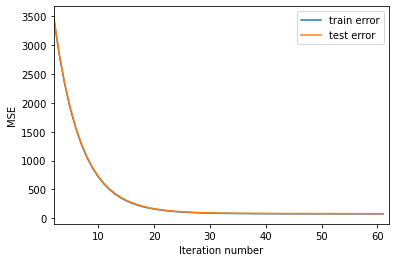

10
20
30
40
50
55
Ошибка алгоритма из 55 деревьев глубиной 4 с шагом 0.1 на тренировочной выборке: 70.7204157323836
Ошибка алгоритма из 55 деревьев глубиной 4 с шагом 0.1 на тестовой выборке: 77.82472661155033


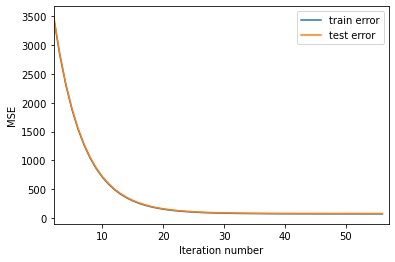

10
20
30
40
50
52
Ошибка алгоритма из 52 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 66.91247925748041
Ошибка алгоритма из 52 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 77.08331573704959


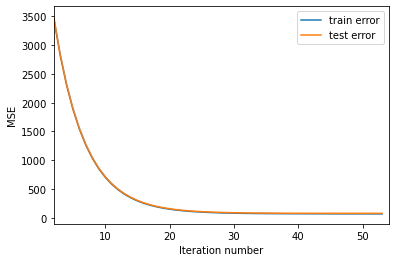

10
20
30
40
46
Ошибка алгоритма из 46 деревьев глубиной 6 с шагом 0.1 на тренировочной выборке: 64.1585162001965
Ошибка алгоритма из 46 деревьев глубиной 6 с шагом 0.1 на тестовой выборке: 77.9879673807337


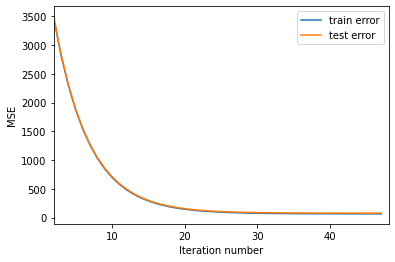

Лучшие параметры: Ошибка алгоритма из 52 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 77.08331573704959


In [25]:
n_trees_l = [350]
max_depth_l = [2, 3, 4, 5, 6]
eta_l = [0.1]

tr_b, dp_b, et_b = grid_mtrs(n_trees_l, max_depth_l, eta_l, X, y)

In [29]:
def gb_fit_lt_half_div(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    half_n = X_train.shape[0] // 2
        
    for i in range(n_trees):
        if i % 2:
            b = 1
        else:
            b = 0
        beg_b = half_n*b
        end_b = half_n*(b+1)
        X_tr = X[beg_b : end_b, :]
        y_tr = y[beg_b : end_b]
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            
            tree = build_tree_depth_lim(X_tr, y_tr, max_depth)

            train_errors.append(mean_squared_error(y_tr, gb_predict(X_tr, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_tr, trees, coefs, eta)

            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_depth_lim(X_tr, bias(y_tr, target), max_depth)

            train_errors.append(mean_squared_error(y_tr, gb_predict(X_tr, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [30]:
def grid_mtr_hd(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_lt_half_div(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
                test_prediction = gb_predict(X_test, trees, coefs, et)
                err = mean_squared_error(y_test, test_prediction)
                print(f'Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = tr
                    dp_b = dp
                    et_b = et
                    err_min = err
                get_error_plot(tr, train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 77.25508923004918
Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тестовой выборке: 80.09910638531058


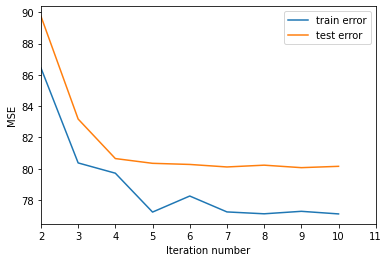

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 592.0186130801384
Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 602.8434115990716


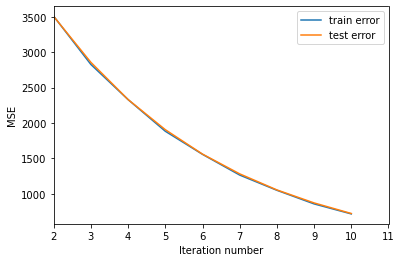

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 75.89313316419806
Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тестовой выборке: 78.2420333638797


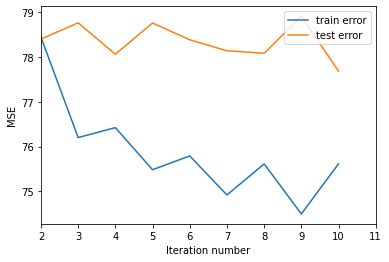

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 584.3724839785796
Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 595.140687594724


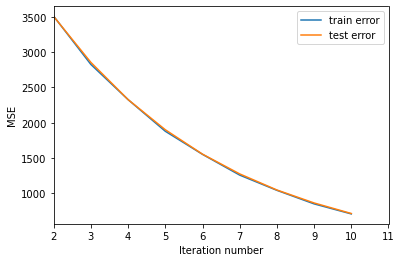

Ошибка алгоритма из 20 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 77.32711207981906
Ошибка алгоритма из 20 деревьев глубиной 3 с шагом 1 на тестовой выборке: 80.21084582061344


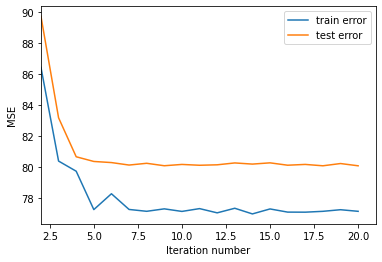

Ошибка алгоритма из 20 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 142.09235735602778
Ошибка алгоритма из 20 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 147.64419942207095


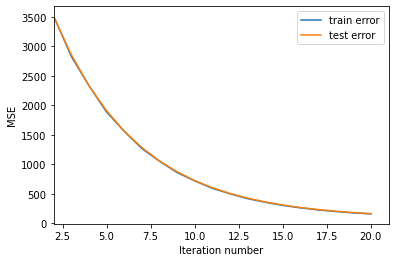

Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 75.92730837434186
Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 1 на тестовой выборке: 80.02759237044842


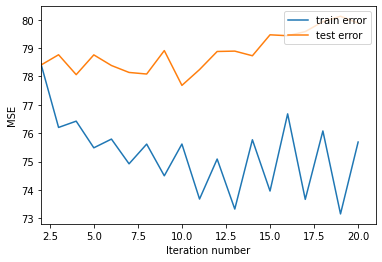

Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 135.22162982185415
Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 140.55309902275772


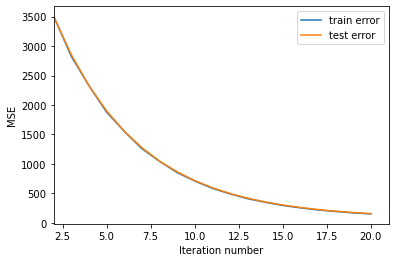

Лучшие параметры: Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 78.2420333638797


(10, 5, 1)

In [31]:
# n_trees_l = [10, 20]
# max_depth_l = [3, 5]
# eta_l = [1, 0.1]

# grid_mtr_hd(n_trees_l, max_depth_l, eta_l, X, y)

In [37]:
def gb_fit_fin(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_depth_lim(X, y, max_depth)
            
            errors.append(mean_squared_error(y, gb_predict(X, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_depth_lim(X, bias(y, target), max_depth)
            
            errors.append(mean_squared_error(y, gb_predict(X, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [38]:
def gb_fit_fin_hd(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    half_n = X.shape[0] // 2
    
    for i in range(n_trees):

        if i % 2:
            b = 1
        else:
            b = 0
        beg_b = half_n*b
        end_b = half_n*(b+1)
        X_b = X[beg_b : end_b, :]
        y_b = y[beg_b : end_b]

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_depth_lim(X_b, y_b, max_depth)
            
            errors.append(mean_squared_error(y_b, gb_predict(X_b, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_b, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_depth_lim(X_b, bias(y_b, target), max_depth)
            
            errors.append(mean_squared_error(y_b, gb_predict(X_b, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [39]:
coefs = [1] * tr_b # для простоты примем коэффициенты равными 1

trees, errors = gb_fit_fin(tr_b, dp_b, X, y, coefs, et_b)

In [41]:
prediction = gb_predict(test_X, trees, coefs, et_b)
prediction

array([53.92639724, 62.35436574, 47.68839771, ..., 54.04465359,
       62.96192689, 68.55967216])

In [43]:
result = test[['Id']].copy()
result = pd.concat([result, pd.DataFrame(prediction, columns=['mean_exam_points'])], axis=1)
result

,Id,mean_exam_points
0,10000,53.926397
1,10001,62.354366
2,10002,47.688398
3,10003,88.900817
4,10004,88.025602
...,...,...
9995,19995,42.475903
9996,19996,78.154151
9997,19997,54.044654
9998,19998,62.961927


In [44]:
result.to_csv("East_reg.csv", sep=",", index=False)